# Übergangswahrscheinlichkeiten
###  Bestimme relative Übergangswahrscheinlichkeiten vom Zustand Zuhause an Werktagen in Abhängigkeit des Zeitschrittes

### Zustände

* Zuhause -> 1
* Arbeit -> 2 
* Einkaufen -> 3 
* Freizeit -> 4
* Sonstiges -> 5

In [148]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Rohdaten\NHTS_trips_processed.csv"

df = pd.read_csv(path)

In [150]:
df.head()

,ID,Type_day,TRPTRANS,Trip_no,Whyfrom,Whyto,Distance,Trip_duration,Departure_hhmm,Arrival_hhmm,Departure,Arrival,Departure_t
0,300000071,1,3,1,1,4,8.439,15,1000,1015,600,615,40
1,300000071,1,3,2,4,1,8.286,20,1510,1530,910,930,61
2,300000073,1,3,1,1,2,3.621,15,845,900,525,540,35
3,300000073,1,3,2,2,1,3.610,15,1430,1445,870,885,58
4,300000081,4,6,1,1,2,12.902,15,1115,1130,675,690,45


## Beschränkung auf Werktage

In [151]:
filt = df["Type_day"] < 6
df = df[filt]

In [152]:
df["Type_day"].value_counts()

5    125244
4    121709
3    119685
2    119556
1    110674
Name: Type_day, dtype: int64

## Filtern nach Ausgangszuständen

In [153]:
zuhause = df[df["Whyfrom"]==1]

arbeit = df[df["Whyfrom"]==2]

einkaufen = df[df["Whyfrom"]==3]

freizeit = df[df["Whyfrom"]==4]

sonstiges = df[df["Whyfrom"]==5]


In [154]:
# Vernachlässige Rundreisen
zuhause = zuhause[zuhause["Whyto"] != 1]
arbeit = arbeit[arbeit["Whyto"] != 2]
einkaufen = einkaufen[einkaufen["Whyto"] != 3]
freizeit = freizeit[freizeit["Whyto"] != 4]
sonstiges = sonstiges[sonstiges["Whyto"] != 5]

## Gruppieren der Trips nach Zeitschritt des Wegbeginns

In [155]:
zuhause_grpd = zuhause.groupby(["Departure_t"])
arbeit_grpd = arbeit.groupby(["Departure_t"])
einkaufen_grpd = einkaufen.groupby(["Departure_t"])
freizeit_grpd = freizeit.groupby(["Departure_t"])
sonstiges_grpd = sonstiges.groupby(["Departure_t"])

## Zuordnen der relativen Übergangswahrscheinlichkeiten zu den anderen Zuständen in jedem Zeitschritt

In [156]:
zuhause_arbeit = [0 for i in range(97)]
zuhause_einkaufen = [0 for i in range(97)]
zuhause_freizeit = [0 for i in range(97)]
zuhause_sonstiges = [0 for i in range(97)]

arbeit_zuhause = [0 for i in range(97)]
arbeit_einkaufen = [0 for i in range(97)]
arbeit_freizeit = [0 for i in range(97)]
arbeit_sonstiges = [0 for i in range(97)]

einkaufen_arbeit = [0 for i in range(97)]
einkaufen_zuhause = [0 for i in range(97)]
einkaufen_freizeit = [0 for i in range(97)]
einkaufen_sonstiges = [0 for i in range(97)]

freizeit_arbeit = [0 for i in range(97)]
freizeit_einkaufen = [0 for i in range(97)]
freizeit_zuhause = [0 for i in range(97)]
freizeit_sonstiges = [0 for i in range(97)]

sonstiges_arbeit = [0 for i in range(97)]
sonstiges_einkaufen = [0 for i in range(97)]
sonstiges_freizeit = [0 for i in range(97)]
sonstiges_zuhause = [0 for i in range(97)]

In [157]:
# zähle relative Häufigkeit der Trips zum gegebenen Zustand in Zeitschritt t
for t, group in zuhause_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(2):
        zuhause_arbeit[t] = counts.get(2)
    if counts.get(3):
        zuhause_einkaufen[t] = counts.get(3)
    if counts.get(4):
        zuhause_freizeit[t] = counts.get(4)
    if counts.get(5):
        zuhause_sonstiges[t] = counts.get(5)

In [158]:
for t, group in arbeit_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(1):
        arbeit_zuhause[t] = counts.get(1)
    if counts.get(3):
        arbeit_einkaufen[t] = counts.get(3)
    if counts.get(4):
        arbeit_freizeit[t] = counts.get(4)
    if counts.get(5):
        arbeit_sonstiges[t] = counts.get(5)

In [159]:
for t, group in einkaufen_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(1):
        einkaufen_zuhause[t] = counts.get(1)
    if counts.get(2):
        einkaufen_arbeit[t] = counts.get(2)
    if counts.get(4):
        einkaufen_freizeit[t] = counts.get(4)
    if counts.get(5):
        einkaufen_sonstiges[t] = counts.get(5)

In [160]:
for t, group in freizeit_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(1):
        freizeit_zuhause[t] = counts.get(1)
    if counts.get(2):
        freizeit_arbeit[t] = counts.get(2)
    if counts.get(3):
        freizeit_einkaufen[t] = counts.get(3)
    if counts.get(5):
        freizeit_sonstiges[t] = counts.get(5)

In [161]:
for t, group in sonstiges_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(1):
        sonstiges_zuhause[t] = counts.get(1)
    if counts.get(2):
        sonstiges_arbeit[t] = counts.get(2)
    if counts.get(3):
        sonstiges_einkaufen[t] = counts.get(3)
    if counts.get(4):
        sonstiges_freizeit[t] = counts.get(4)

## Visualisierung

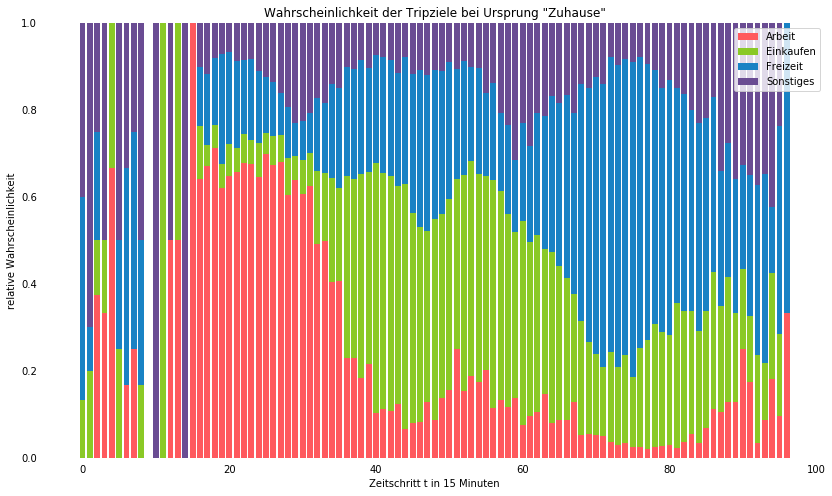

In [162]:
plt.figure(figsize=(14,8))
x = np.linspace(0,96, 97)
plt.bar(x, zuhause_arbeit, label="Arbeit", color='#FF595E');
plt.bar(x, zuhause_einkaufen, bottom=zuhause_arbeit, label="Einkaufen", color='#8AC926');
plt.bar(x, zuhause_freizeit, bottom=[i+j for i,j in zip(zuhause_arbeit,zuhause_einkaufen)], label="Freizeit", color='#1982C4');
plt.bar(x, zuhause_sonstiges, bottom=[i+j+k for i,j,k in zip(zuhause_arbeit,zuhause_einkaufen,zuhause_freizeit)], label="Sonstiges", color='#6A4C93');
plt.xlabel("Zeitschritt t in 15 Minuten")
plt.ylabel("relative Wahrscheinlichkeit")
plt.box(on=None)
plt.title("Wahrscheinlichkeit der Tripziele bei Ursprung \"Zuhause\"");
plt.tick_params(top=False, bottom=False, left=False, right=False, labelbottom=True)
plt.legend();


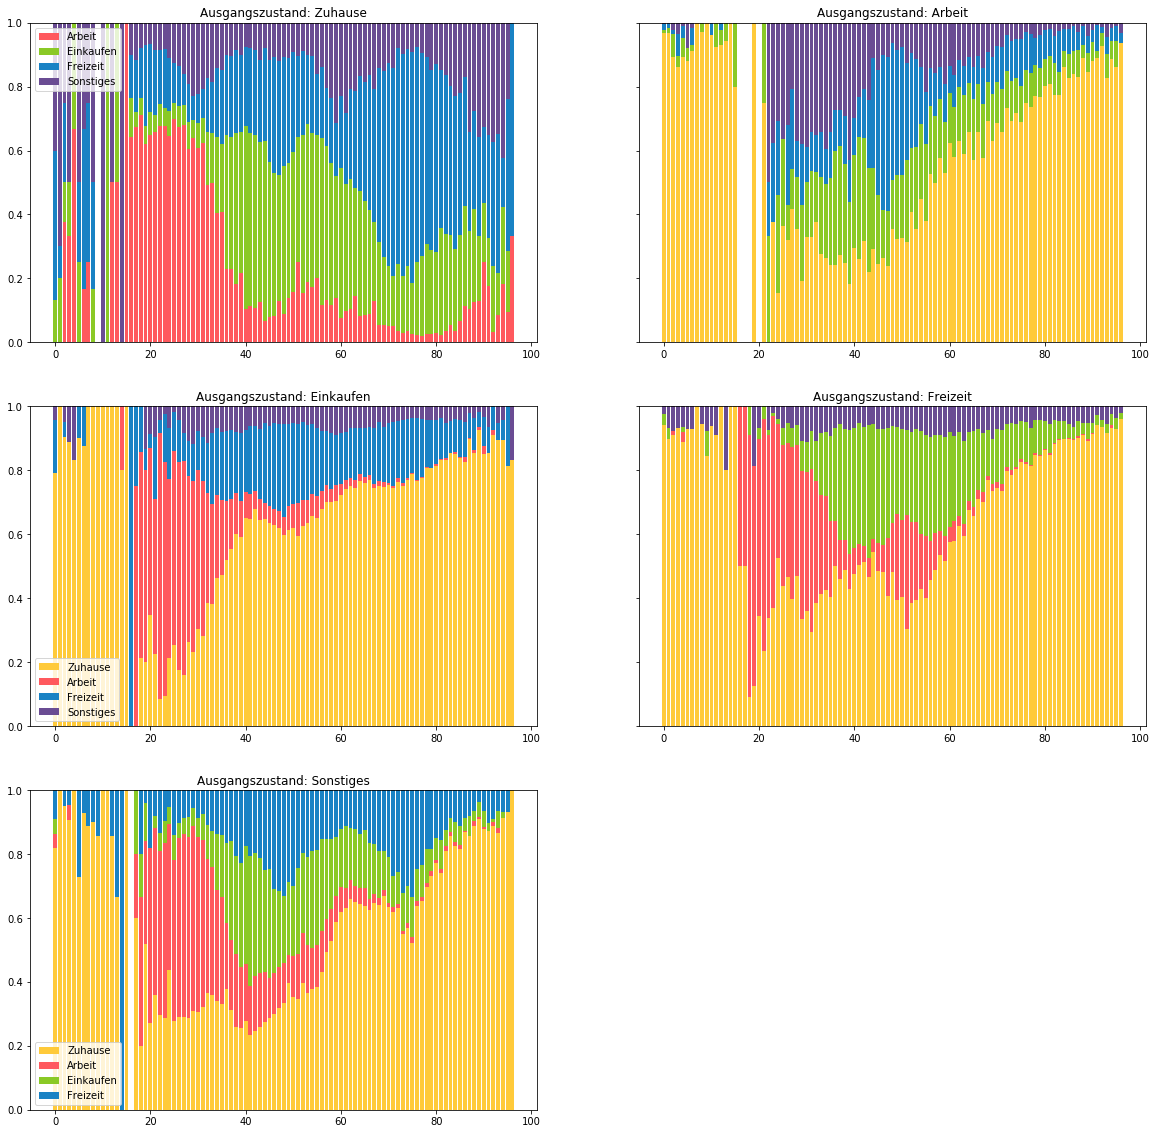

In [163]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,20), sharey=True)
x = np.linspace(0,96, 97)
ax1.bar(x, zuhause_arbeit, label="Arbeit", color='#FF595E');
ax1.bar(x, zuhause_einkaufen, bottom=zuhause_arbeit, label="Einkaufen", color='#8AC926');
ax1.bar(x, zuhause_freizeit, bottom=[i+j for i,j in zip(zuhause_arbeit,zuhause_einkaufen)], label="Freizeit", color='#1982C4');
ax1.bar(x, zuhause_sonstiges, bottom=[i+j+k for i,j,k in zip(zuhause_arbeit,zuhause_einkaufen,zuhause_freizeit)], label="Sonstiges", color='#6A4C93');
ax1.set_title("Ausgangszustand: Zuhause")
ax1.legend()

ax2.bar(x, arbeit_zuhause, label="Zuhause", color='#FFCA3A');
ax2.bar(x, arbeit_einkaufen, bottom=arbeit_zuhause, label="Einkaufen", color='#8AC926');
ax2.bar(x, arbeit_freizeit, bottom=[i+j for i,j in zip(arbeit_zuhause,arbeit_einkaufen)], label="Freizeit", color='#1982C4');
ax2.bar(x, arbeit_sonstiges, bottom=[i+j+k for i,j,k in zip(arbeit_zuhause,arbeit_einkaufen,arbeit_freizeit)], label="Sonstiges", color='#6A4C93')
ax2.set_title("Ausgangszustand: Arbeit")

ax3.bar(x, einkaufen_zuhause, label="Zuhause", color='#FFCA3A');
ax3.bar(x, einkaufen_arbeit, bottom=einkaufen_zuhause, label="Arbeit", color='#FF595E');
ax3.bar(x, einkaufen_freizeit, bottom=[i+j for i,j in zip(einkaufen_zuhause,einkaufen_arbeit)], label="Freizeit", color='#1982C4');
ax3.bar(x, einkaufen_sonstiges, bottom=[i+j+k for i,j,k in zip(einkaufen_zuhause,einkaufen_arbeit,einkaufen_freizeit)], label="Sonstiges", color='#6A4C93')
ax3.set_title("Ausgangszustand: Einkaufen")
ax3.legend()

ax4.bar(x, freizeit_zuhause, label="Zuhause", color='#FFCA3A');
ax4.bar(x, freizeit_arbeit, bottom=freizeit_zuhause, label="Arbeit", color='#FF595E');
ax4.bar(x, freizeit_einkaufen, bottom=[i+j for i,j in zip(freizeit_zuhause,freizeit_arbeit)], label="Einkaufen", color='#8AC926');
ax4.set_title("Ausgangszustand: Freizeit")
ax4.bar(x, freizeit_sonstiges, bottom=[i+j+k for i,j,k in zip(freizeit_zuhause,freizeit_arbeit,freizeit_einkaufen)], label="Sonstiges", color='#6A4C93')

ax5.bar(x, sonstiges_zuhause, label="Zuhause", color='#FFCA3A');
ax5.bar(x, sonstiges_arbeit, bottom=sonstiges_zuhause, label="Arbeit", color='#FF595E');
ax5.bar(x, sonstiges_einkaufen, bottom=[i+j for i,j in zip(sonstiges_zuhause,sonstiges_arbeit)], label="Einkaufen", color='#8AC926');
ax5.bar(x, sonstiges_freizeit, bottom=[i+j+k for i,j,k in zip(sonstiges_zuhause,sonstiges_arbeit,sonstiges_einkaufen)], label="Freizeit", color='#1982C4')
ax5.set_title("Ausgangszustand: Sonstiges")
ax5.legend()

fig.delaxes(ax6)

## Umgang mit fehlenden Übergangswahrscheinlichkeiten

In [164]:
zuhause_arbeit = [0 for i in range(97)]
zuhause_einkaufen = [0 for i in range(97)]
zuhause_freizeit = [0 for i in range(97)]
zuhause_sonstiges = [0 for i in range(97)]

arbeit_zuhause = [0 for i in range(97)]
arbeit_einkaufen = [0 for i in range(97)]
arbeit_freizeit = [0 for i in range(97)]
arbeit_sonstiges = [0 for i in range(97)]

einkaufen_arbeit = [0 for i in range(97)]
einkaufen_zuhause = [0 for i in range(97)]
einkaufen_freizeit = [0 for i in range(97)]
einkaufen_sonstiges = [0 for i in range(97)]

freizeit_arbeit = [0 for i in range(97)]
freizeit_einkaufen = [0 for i in range(97)]
freizeit_zuhause = [0 for i in range(97)]
freizeit_sonstiges = [0 for i in range(97)]

sonstiges_arbeit = [0 for i in range(97)]
sonstiges_einkaufen = [0 for i in range(97)]
sonstiges_freizeit = [0 for i in range(97)]
sonstiges_zuhause = [0 for i in range(97)]

In [165]:
# zähle relative Häufigkeit der Trips zum gegebenen Zustand in Zeitschritt t
for t, group in zuhause_grpd:
    counts = group["Whyto"].value_counts()
    if counts.get(2):
        zuhause_arbeit[t] = counts.get(2)
    if counts.get(3):
        zuhause_einkaufen[t] = counts.get(3)
    if counts.get(4):
        zuhause_freizeit[t] = counts.get(4)
    if counts.get(5):
        zuhause_sonstiges[t] = counts.get(5)

In [166]:
for t, group in arbeit_grpd:
    counts = group["Whyto"].value_counts()
    if counts.get(1):
        arbeit_zuhause[t] = counts.get(1)
    if counts.get(3):
        arbeit_einkaufen[t] = counts.get(3)
    if counts.get(4):
        arbeit_freizeit[t] = counts.get(4)
    if counts.get(5):
        arbeit_sonstiges[t] = counts.get(5)

In [167]:
for t, group in einkaufen_grpd:
    counts = group["Whyto"].value_counts()
    if counts.get(1):
        einkaufen_zuhause[t] = counts.get(1)
    if counts.get(2):
        einkaufen_arbeit[t] = counts.get(2)
    if counts.get(4):
        einkaufen_freizeit[t] = counts.get(4)
    if counts.get(5):
        einkaufen_sonstiges[t] = counts.get(5)

In [168]:
for t, group in freizeit_grpd:
    counts = group["Whyto"].value_counts()
    if counts.get(1):
        freizeit_zuhause[t] = counts.get(1)
    if counts.get(2):
        freizeit_arbeit[t] = counts.get(2)
    if counts.get(3):
        freizeit_einkaufen[t] = counts.get(3)
    if counts.get(5):
        freizeit_sonstiges[t] = counts.get(5)

In [169]:
for t, group in sonstiges_grpd:
    counts = group["Whyto"].value_counts()
    if counts.get(1):
        sonstiges_zuhause[t] = counts.get(1)
    if counts.get(2):
        sonstiges_arbeit[t] = counts.get(2)
    if counts.get(3):
        sonstiges_einkaufen[t] = counts.get(3)
    if counts.get(4):
        sonstiges_freizeit[t] = counts.get(4)

In [170]:
def adjust_probabilities(a, b, c, d, end, start=0):
    for i in range(start, end):
        a[i] = calc_hourly_average(a, i) 
        b[i] = calc_hourly_average(b, i)
        c[i] = calc_hourly_average(c, i)
        d[i] = calc_hourly_average(d, i)

In [171]:
def calc_hourly_average(data, start):
    if start == 0:
        interval_sum = data[96] + data[0] + data[1]
    else:
        interval_sum = 0
        for j in range(-1, 2):
            interval_sum += data[start+j]
    interval_average = interval_sum / 3
    return interval_average
        
def normalize(values):
    for i in range(97):
        total = sum([val[i] for val in values])
        if total != 0:
            for val in values:
                val[i] = val[i] / total
    

In [172]:
adjust_probabilities(zuhause_arbeit, zuhause_einkaufen, zuhause_freizeit, zuhause_sonstiges, 20)
adjust_probabilities(arbeit_zuhause, arbeit_einkaufen, arbeit_freizeit, arbeit_sonstiges, 20)
adjust_probabilities(einkaufen_zuhause, einkaufen_arbeit, einkaufen_freizeit, einkaufen_sonstiges, 20)
adjust_probabilities(freizeit_zuhause, freizeit_arbeit, freizeit_einkaufen, freizeit_sonstiges, 20)
adjust_probabilities(sonstiges_zuhause, sonstiges_arbeit, sonstiges_einkaufen, sonstiges_freizeit, 20)

normalize([zuhause_arbeit, zuhause_einkaufen, zuhause_freizeit, zuhause_sonstiges])
normalize([arbeit_zuhause, arbeit_einkaufen, arbeit_freizeit, arbeit_sonstiges])
normalize([einkaufen_zuhause, einkaufen_arbeit, einkaufen_freizeit, einkaufen_sonstiges])
normalize([freizeit_zuhause, freizeit_arbeit, freizeit_einkaufen, freizeit_sonstiges])
normalize([sonstiges_zuhause, sonstiges_arbeit, sonstiges_einkaufen, sonstiges_freizeit])

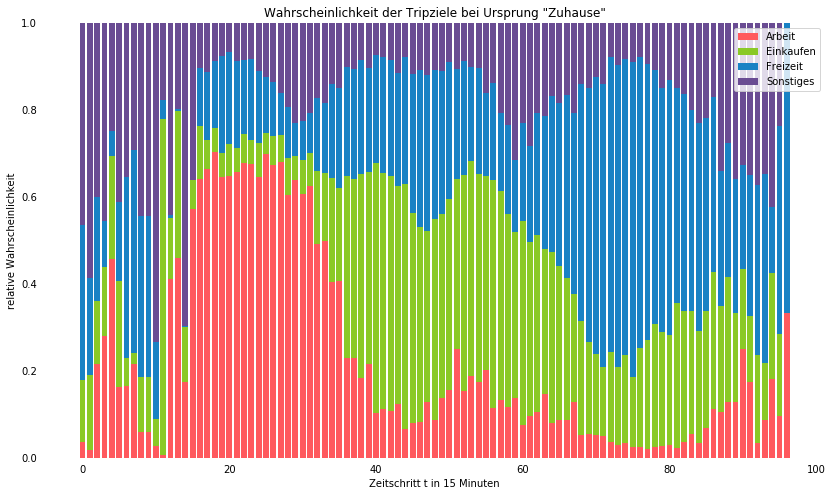

In [173]:
plt.figure(figsize=(14,8))
x = np.linspace(0,96, 97)
plt.bar(x, zuhause_arbeit, label="Arbeit", color='#FF595E');
plt.bar(x, zuhause_einkaufen, bottom=zuhause_arbeit, label="Einkaufen", color='#8AC926');
plt.bar(x, zuhause_freizeit, bottom=[i+j for i,j in zip(zuhause_arbeit,zuhause_einkaufen)], label="Freizeit", color='#1982C4');
plt.bar(x, zuhause_sonstiges, bottom=[i+j+k for i,j,k in zip(zuhause_arbeit,zuhause_einkaufen,zuhause_freizeit)], label="Sonstiges", color='#6A4C93');
plt.xlabel("Zeitschritt t in 15 Minuten")
plt.ylabel("relative Wahrscheinlichkeit")
plt.box(on=None)
plt.title("Wahrscheinlichkeit der Tripziele bei Ursprung \"Zuhause\"");
plt.tick_params(top=False, bottom=False, left=False, right=False, labelbottom=True)
plt.legend();

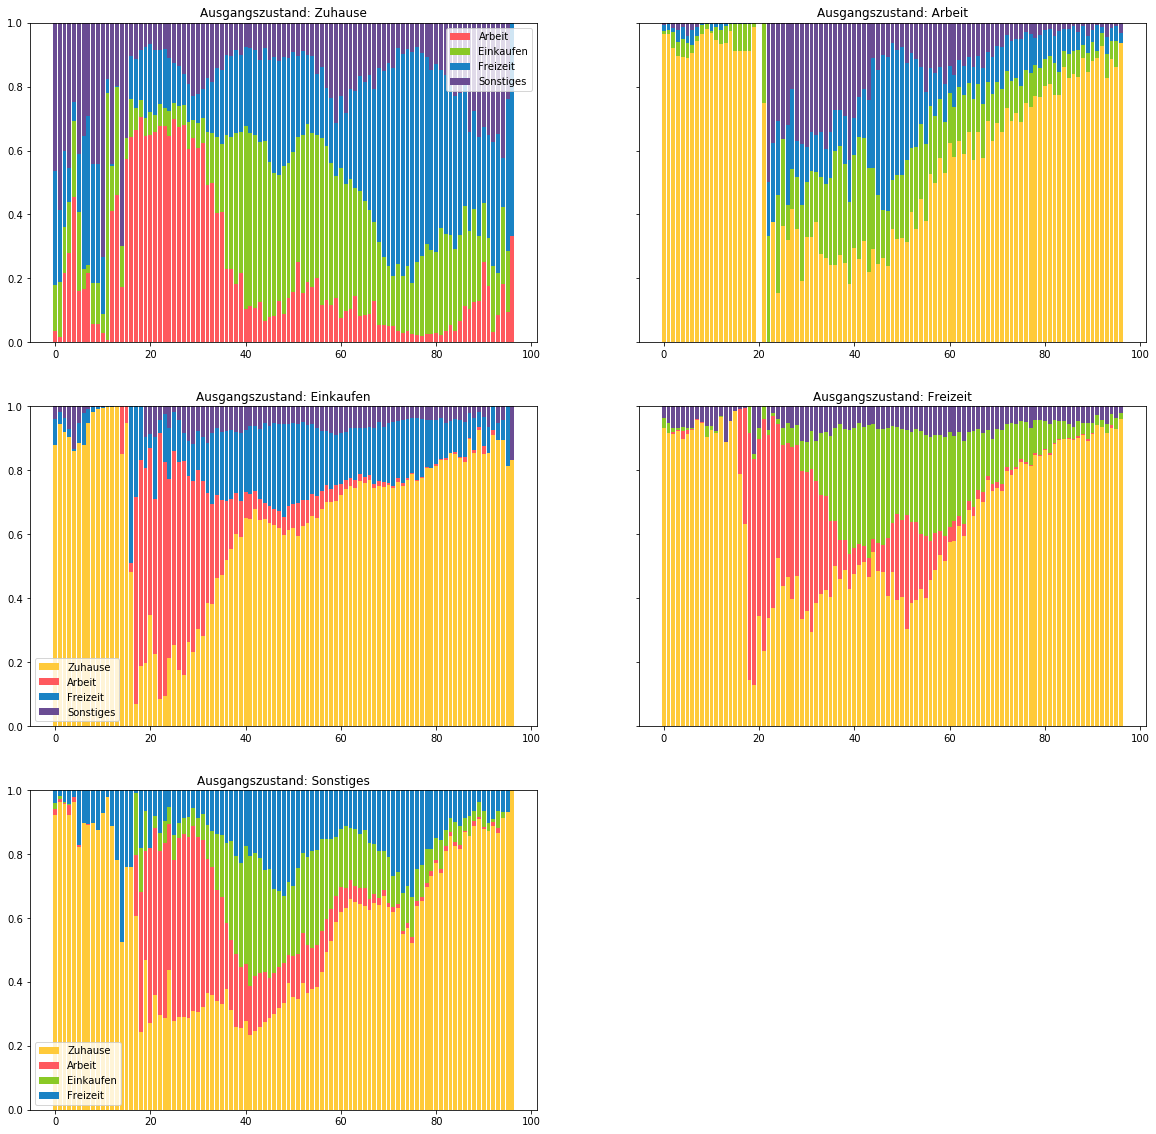

In [174]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,20), sharey=True)
x = np.linspace(0,96, 97)
ax1.bar(x, zuhause_arbeit, label="Arbeit", color='#FF595E');
ax1.bar(x, zuhause_einkaufen, bottom=zuhause_arbeit, label="Einkaufen", color='#8AC926');
ax1.bar(x, zuhause_freizeit, bottom=[i+j for i,j in zip(zuhause_arbeit,zuhause_einkaufen)], label="Freizeit", color='#1982C4');
ax1.bar(x, zuhause_sonstiges, bottom=[i+j+k for i,j,k in zip(zuhause_arbeit,zuhause_einkaufen,zuhause_freizeit)], label="Sonstiges", color='#6A4C93');
ax1.set_title("Ausgangszustand: Zuhause")
ax1.legend()

ax2.bar(x, arbeit_zuhause, label="Zuhause", color='#FFCA3A');
ax2.bar(x, arbeit_einkaufen, bottom=arbeit_zuhause, label="Einkaufen", color='#8AC926');
ax2.bar(x, arbeit_freizeit, bottom=[i+j for i,j in zip(arbeit_zuhause,arbeit_einkaufen)], label="Freizeit", color='#1982C4');
ax2.bar(x, arbeit_sonstiges, bottom=[i+j+k for i,j,k in zip(arbeit_zuhause,arbeit_einkaufen,arbeit_freizeit)], label="Sonstiges", color='#6A4C93')
ax2.set_title("Ausgangszustand: Arbeit")

ax3.bar(x, einkaufen_zuhause, label="Zuhause", color='#FFCA3A');
ax3.bar(x, einkaufen_arbeit, bottom=einkaufen_zuhause, label="Arbeit", color='#FF595E');
ax3.bar(x, einkaufen_freizeit, bottom=[i+j for i,j in zip(einkaufen_zuhause,einkaufen_arbeit)], label="Freizeit", color='#1982C4');
ax3.bar(x, einkaufen_sonstiges, bottom=[i+j+k for i,j,k in zip(einkaufen_zuhause,einkaufen_arbeit,einkaufen_freizeit)], label="Sonstiges", color='#6A4C93')
ax3.set_title("Ausgangszustand: Einkaufen")
ax3.legend()

ax4.bar(x, freizeit_zuhause, label="Zuhause", color='#FFCA3A');
ax4.bar(x, freizeit_arbeit, bottom=freizeit_zuhause, label="Arbeit", color='#FF595E');
ax4.bar(x, freizeit_einkaufen, bottom=[i+j for i,j in zip(freizeit_zuhause,freizeit_arbeit)], label="Einkaufen", color='#8AC926');
ax4.set_title("Ausgangszustand: Freizeit")
ax4.bar(x, freizeit_sonstiges, bottom=[i+j+k for i,j,k in zip(freizeit_zuhause,freizeit_arbeit,freizeit_einkaufen)], label="Sonstiges", color='#6A4C93')

ax5.bar(x, sonstiges_zuhause, label="Zuhause", color='#FFCA3A');
ax5.bar(x, sonstiges_arbeit, bottom=sonstiges_zuhause, label="Arbeit", color='#FF595E');
ax5.bar(x, sonstiges_einkaufen, bottom=[i+j for i,j in zip(sonstiges_zuhause,sonstiges_arbeit)], label="Einkaufen", color='#8AC926');
ax5.bar(x, sonstiges_freizeit, bottom=[i+j+k for i,j,k in zip(sonstiges_zuhause,sonstiges_arbeit,sonstiges_einkaufen)], label="Freizeit", color='#1982C4')
ax5.set_title("Ausgangszustand: Sonstiges")
ax5.legend()

fig.delaxes(ax6)

In [175]:
for i in range(97):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-175-635ca4e87ecb>, line 2)

## Speichern Ergebnisse

In [ ]:
übergangswahrscheinlichkeiten_zuhause=[[i, j, k, l] for i,j,k,l in zip(zuhause_arbeit, zuhause_einkaufen, zuhause_freizeit, zuhause_sonstiges)]
übergangswahrscheinlichkeiten_arbeit=[[i, j, k, l] for i,j,k,l in zip(arbeit_zuhause, arbeit_einkaufen, arbeit_freizeit, arbeit_sonstiges)]
übergangswahrscheinlichkeiten_einkaufen=[[i, j, k, l] for i,j,k,l in zip(einkaufen_zuhause, einkaufen_arbeit, einkaufen_freizeit, einkaufen_sonstiges)]
übergangswahrscheinlichkeiten_freizeit=[[i, j, k, l] for i,j,k,l in zip(freizeit_zuhause, freizeit_arbeit, freizeit_einkaufen, freizeit_sonstiges)]
übergangswahrscheinlichkeiten_sonstiges=[[i, j, k, l] for i,j,k,l in zip(sonstiges_zuhause, sonstiges_arbeit, sonstiges_einkaufen, sonstiges_freizeit)]

übergangswahrscheinlichkeiten = [übergangswahrscheinlichkeiten_zuhause, übergangswahrscheinlichkeiten_arbeit, übergangswahrscheinlichkeiten_einkaufen, übergangswahrscheinlichkeiten_freizeit, übergangswahrscheinlichkeiten_sonstiges]

In [ ]:
from pathlib import Path
import pickle
import os

os.chdir('..')
os.chdir('.'+"\\Datenauswertung\\")
if not os.path.exists(os.getcwd()+ "\\Simulationsdaten"):
    os.makedirs(root+"\\Simulationsdaten")

path = os.getcwd()+"\\Simulationsdaten"+"\\Übergangswahrscheinlichkeiten.pickle"

#pickle.dump(übergangswahrscheinlichkeiten, open(path, "wb"))

In [ ]:
os.getcwd()